# Exploratory Data Analysis

In [17]:
#import the librraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [18]:
df = pd.read_csv('sales_data.csv', engine='python') #read the dataset

<br><br>
**Take a look at the dataset**
<br><br>

In [19]:
df.head() #show five datas from the top

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [20]:
df.info() #show the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-null obje

In [21]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) #convert ORDERDATE to pandas datetime format

In [22]:
df.info() #show the info, ORDERDATE become datetime64[ns] format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null datetime64[ns]
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-n

In [23]:
df.sort_values(by = ['ORDERDATE'], inplace = True) #sorting data by ORDERDATE
df.set_index('ORDERDATE', inplace = True) #setting the index to be the ORDERDATE (it will hep a lot later on)

In [24]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,22,86.51,4,1903.22,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2003-01-06,10100,49,34.47,1,1689.03,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2003-01-09,10101,45,31.20,3,1404.00,Shipped,1,1,2003,Vintage Cars,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small


<br><br>
**Check if there is any null data or not**
<br><br>

In [25]:
print(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


<br><br>
**Since there are lot of null values in ADDRESSLINE2, STATE, POSTALCODE, COUNTRY, and TERRITORY, the I will drop them. COUNTRY and CITY will represent the order geographical information**
<br><br>

In [26]:
to_drop = ['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']
df = df.drop(to_drop, axis = 1)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,22,86.51,4,1903.22,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Small
2003-01-06,10100,49,34.47,1,1689.03,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Small
2003-01-09,10101,45,31.20,3,1404.00,Shipped,1,1,2003,Vintage Cars,33,S24_1937,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,Germany,Keitel,Roland,Small


In [27]:
print(df.isnull().sum()) #checking again if there are null values

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [28]:
#show the unique value of each column
for c in df.columns:
    print(f'Number of {c} unique values: {df[c].nunique()}')

Number of ORDERNUMBER unique values: 307
Number of QUANTITYORDERED unique values: 58
Number of PRICEEACH unique values: 1016
Number of ORDERLINENUMBER unique values: 18
Number of SALES unique values: 2763
Number of STATUS unique values: 6
Number of QTR_ID unique values: 4
Number of MONTH_ID unique values: 12
Number of YEAR_ID unique values: 3
Number of PRODUCTLINE unique values: 7
Number of MSRP unique values: 80
Number of PRODUCTCODE unique values: 109
Number of CUSTOMERNAME unique values: 92
Number of PHONE unique values: 91
Number of ADDRESSLINE1 unique values: 92
Number of CITY unique values: 73
Number of COUNTRY unique values: 19
Number of CONTACTLASTNAME unique values: 77
Number of CONTACTFIRSTNAME unique values: 72
Number of DEALSIZE unique values: 3


In [29]:
df.describe() # describing the data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


<br><br>
**Find out 20 Most Valuable Customers**
<br><br>
The Most Valuable Customers are the customer who are the most profitable for a company (have a big sales on them). These customers buy more or higher-value than the other customers.
<br><br>

In [30]:
top_customer = df.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(20) #sorting the customers as per the sales
top_customer = top_customer[['SALES']].round(3) #round off the sales value up to 3 decimal places
top_customer.reset_index(inplace = True) #reset the index to add the customer name into dataframe

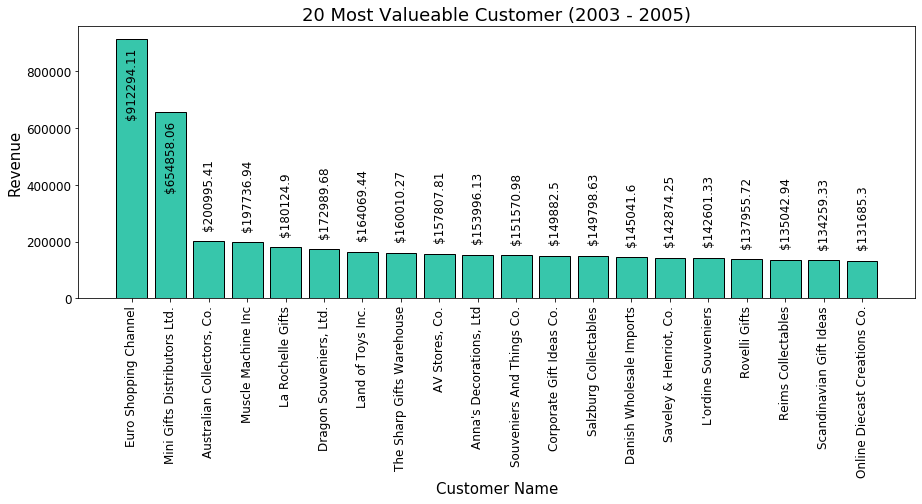

In [31]:
plt.figure(figsize = (15,5)) #width an dheight of figure is defined in inches
plt.title('20 Most Valueable Customer (2003 - 2005)', fontsize = 18)
plt.bar(top_customer['CUSTOMERNAME'], top_customer['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xlabel('Customer Name', fontsize = 15) #x axis shows the customer name
plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v in top_customer['SALES'].items(): #to show the exact revenue generated on the figure
    if v > 600000:
        plt.text(k, v-270000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+ 50000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

<br><br>
**Find out 20 Highest Revenue by Country**
<br>
Here are th Top 20 Country which generated the highest revenue
<br><br>

In [32]:
top_country = df.groupby(['COUNTRY']).sum().sort_values('SALES', ascending = False).head(20) #sort the country as per the sales
top_country = top_country[['SALES']].round(3) #round off teh sales value up to 3 decimal places
top_country.reset_index(inplace = True) #reset the index to add the country into dataframe

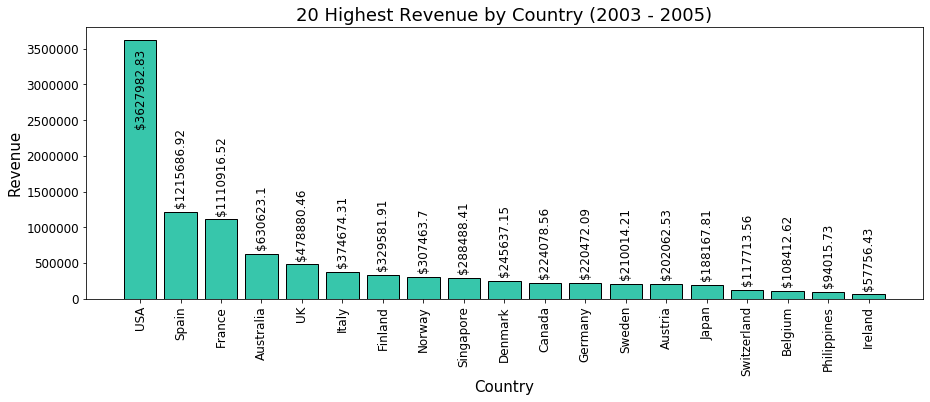

In [33]:
plt.figure(figsize = (15,5)) #width and height of figure is defined in inches
plt.title('20 Highest Revenue by Country (2003 - 2005)', fontsize = 18)
plt.bar(top_country['COUNTRY'], top_country['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xlabel('Country', fontsize = 15) #x axis shows the country
plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v in top_country['SALES'].items(): #to show the exact revenue generated on the figure
    if v > 3000000:
        plt.text(k, v-1200000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+100000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

<br><br>
**Find out 20 Highest Revenue by City**
<br>
Here are th Top 20 City which generated the highest revenue
<br><br>

In [34]:
top_city = df.groupby(['CITY']).sum().sort_values('SALES', ascending = False).head(20) #sort the city as per the sales
top_city = top_city[['SALES']].round(3) #round off the sales value up to 3 decimal places
top_city.reset_index(inplace = True) #reset the index

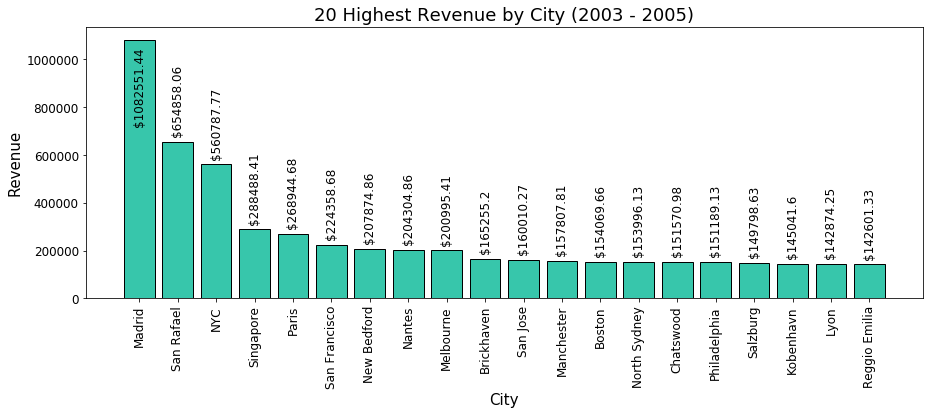

In [35]:
plt.figure(figsize = (15,5))
plt.title('20 Highest Revenue by City (2003 - 2005)', fontsize = 18)
plt.bar(top_city['CITY'], top_city['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1 )
plt.xlabel('City', fontsize = 15) #x axis shows the city
plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v, in top_city['SALES'].items():
    if v > 800000:
        plt.text(k, v-350000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+35000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

<br><br>
**Which products give the highest revenue**
<br><br>

In [36]:
top_product = df.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False) #sort the categories as per the sales
top_product = top_product[['SALES']] #keep only the sales column in dataframe
top_product.reset_index(inplace = True) #reset index
total_revenue_product = top_product['SALES'].sum() #find the total revenue generated as per product line
total_revenue_product = str(int(total_revenue_product)) #convert the total revenue from float to int and then to string
total_revenue_product = '$' + total_revenue_product #adding '$' sign before the value

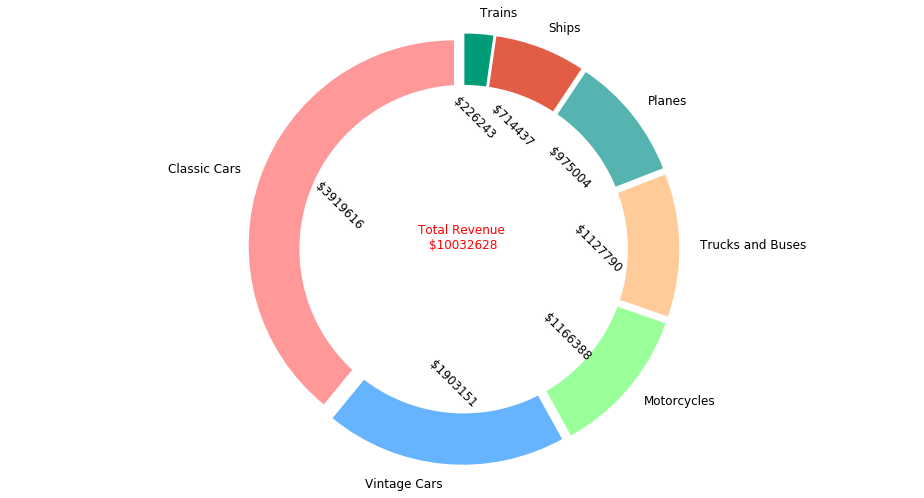

In [37]:
plt.rcParams['figure.figsize'] = (13,7)
plt.rcParams['font.size'] = 12.0 #font size is defined
plt.rcParams['font.weight'] = 6 #font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the product line.
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v = val)
    return my_format
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
pie1 = ax1.pie(top_product['SALES'], colors = colors, labels = top_product['PRODUCTLINE'], autopct = autopct_format(top_product['SALES']), startangle = 90, explode = explode)
fraction_text_list = pie1[2]
for text in fraction_text_list:
    text.set_rotation(315)
center_circle = plt.Circle((0,0), 0.80, fc = 'white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n' + str(total_revenue_product), color = 'red', xy = (0,0), fontsize = 12, ha  ='center')
plt.tight_layout()
plt.show()

<br><br>
**Seen on the figure above, that Classic Cars generated the highest revenue of about 3919616 dollar
<br>
And the total revenue generated by all these product line 10032628 dollar**
<br><br>

<br><br>
**Correlation Features**
<br>
Plotting a correlation matrix to see the overview of how the features are related to one another
<br><br>

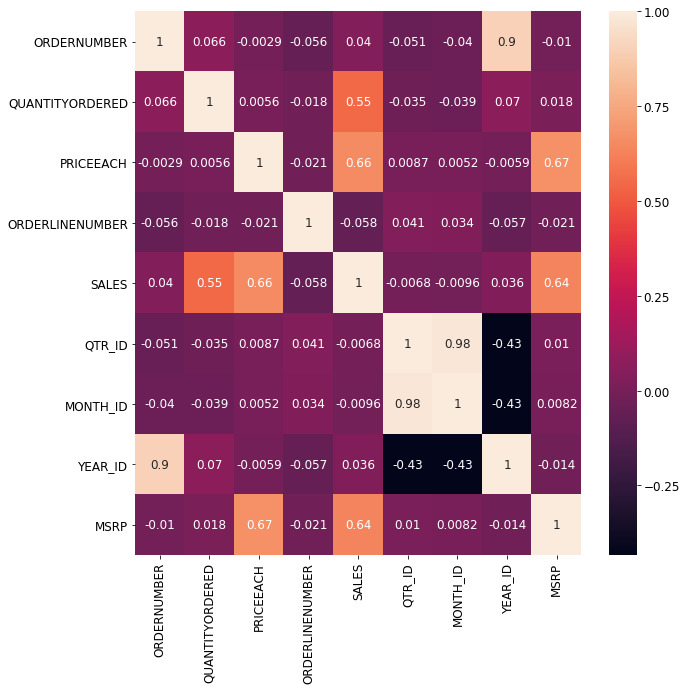

In [47]:
plt.figure(figsize = (10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

<br><br>
**OBSERVATIONS**
* There is high co-relation in ORDERNUMBER and YEAR_ID, and between QTR_ID and MONTH_ID
* +velly correlated between SALES, QUANTITYORDERED, PRICEEACH and MSRP
* YEAR_ID is -velly correlated to QTR_ID and MONTH_ID
<br><br>